In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.plotting.matplotlib.register_converters = True
import warnings
warnings.filterwarnings("ignore")

In [11]:
df=pd.read_csv("/Users/mufseeramusthafa/Documents/machine_learning/airquality_index_predicton/Data/Real-Data/\
Real_Combine.csv")

In [12]:
df.isna().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.25)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [19]:
x_train.shape[1]

8

In [20]:
model=Sequential()
model.add(Dense(128,kernel_initializer="normal",input_dim=x_train.shape[1]
         ,activation="relu"))
model.add(Dense(256,kernel_initializer="normal",activation="relu"))
model.add(Dense(256,kernel_initializer="normal",activation="relu"))
model.add(Dense(256,kernel_initializer="normal",activation="relu"))
model.add(Dense(1,kernel_initializer="normal",activation="linear"))
model.compile(loss="mean_absolute_error",optimizer="adam",metrics=["mean_absolute_error",])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


In [23]:
# fitting ANN to training set
model_history=model.fit(x_train,y_train,validation_split=.33,batch_size=10,epochs=100)

Epoch 1/100
55/55 [==============================] - 0s 3ms/step - loss: 78.8830 - mean_absolute_error: 78.8830 - val_loss: 64.6852 - val_mean_absolute_error: 64.6852
Epoch 2/100
55/55 [==============================] - 0s 920us/step - loss: 65.0766 - mean_absolute_error: 65.0766 - val_loss: 64.5150 - val_mean_absolute_error: 64.5150
Epoch 3/100
55/55 [==============================] - 0s 900us/step - loss: 61.7652 - mean_absolute_error: 61.7652 - val_loss: 64.0866 - val_mean_absolute_error: 64.0866
Epoch 4/100
55/55 [==============================] - 0s 888us/step - loss: 60.1246 - mean_absolute_error: 60.1246 - val_loss: 49.9996 - val_mean_absolute_error: 49.9996
Epoch 5/100
55/55 [==============================] - 0s 889us/step - loss: 46.8135 - mean_absolute_error: 46.8135 - val_loss: 46.3613 - val_mean_absolute_error: 46.3613
Epoch 6/100
55/55 [==============================] - 0s 890us/step - loss: 43.6196 - mean_absolute_error: 43.6196 - val_loss: 46.1853 - val_mean_absolute_err

55/55 [==============================] - 0s 901us/step - loss: 45.1989 - mean_absolute_error: 45.1989 - val_loss: 49.1991 - val_mean_absolute_error: 49.1991
Epoch 50/100
55/55 [==============================] - 0s 910us/step - loss: 45.4310 - mean_absolute_error: 45.4310 - val_loss: 43.8140 - val_mean_absolute_error: 43.8140
Epoch 51/100
55/55 [==============================] - 0s 892us/step - loss: 39.1794 - mean_absolute_error: 39.1794 - val_loss: 43.7134 - val_mean_absolute_error: 43.7134
Epoch 52/100
55/55 [==============================] - 0s 871us/step - loss: 43.5070 - mean_absolute_error: 43.5070 - val_loss: 42.8761 - val_mean_absolute_error: 42.8761
Epoch 53/100
55/55 [==============================] - 0s 884us/step - loss: 41.4681 - mean_absolute_error: 41.4681 - val_loss: 43.9035 - val_mean_absolute_error: 43.9035
Epoch 54/100
55/55 [==============================] - 0s 952us/step - loss: 39.5892 - mean_absolute_error: 39.5892 - val_loss: 44.0472 - val_mean_absolute_error: 4

55/55 [==============================] - 0s 917us/step - loss: 39.3207 - mean_absolute_error: 39.3207 - val_loss: 43.4120 - val_mean_absolute_error: 43.4120
Epoch 98/100
55/55 [==============================] - 0s 920us/step - loss: 38.7891 - mean_absolute_error: 38.7891 - val_loss: 42.5460 - val_mean_absolute_error: 42.5460
Epoch 99/100
55/55 [==============================] - 0s 875us/step - loss: 37.5115 - mean_absolute_error: 37.5115 - val_loss: 47.8074 - val_mean_absolute_error: 47.8074
Epoch 100/100
55/55 [==============================] - 0s 857us/step - loss: 39.9407 - mean_absolute_error: 39.9407 - val_loss: 43.0271 - val_mean_absolute_error: 43.0271


In [24]:
prediction=model.predict(x_test)

In [25]:
prediction

array([[103.36366 ],
       [189.0422  ],
       [176.49779 ],
       [ 63.978924],
       [ 45.91694 ],
       [139.44627 ],
       [171.97168 ],
       [187.0844  ],
       [ 56.7601  ],
       [218.09703 ],
       [ 93.91011 ],
       [ 72.13574 ],
       [ 41.972275],
       [ 62.088657],
       [ 84.12157 ],
       [ 72.13574 ],
       [232.88979 ],
       [148.41928 ],
       [ 50.42898 ],
       [182.50536 ],
       [ 46.41598 ],
       [ 58.935493],
       [ 44.71091 ],
       [100.56636 ],
       [142.50845 ],
       [ 99.03604 ],
       [ 51.097202],
       [ 84.029366],
       [ 45.51046 ],
       [ 92.3258  ],
       [ 87.53937 ],
       [157.65475 ],
       [ 63.611233],
       [ 78.74832 ],
       [ 53.282345],
       [ 88.25603 ],
       [228.69778 ],
       [ 87.624695],
       [107.39656 ],
       [183.97493 ],
       [ 42.41745 ],
       [ 52.96097 ],
       [133.892   ],
       [116.80051 ],
       [ 77.59132 ],
       [ 84.12157 ],
       [ 47.989956],
       [ 93.9

In [28]:
y_test.values.reshape(-1,1)

array([[104.625     ],
       [125.89166667],
       [279.6       ],
       [110.41666667],
       [ 31.33333333],
       [ 69.66666667],
       [278.        ],
       [119.70833333],
       [ 45.95833333],
       [135.58333333],
       [ 87.83333333],
       [173.58333333],
       [ 12.25      ],
       [ 78.54166667],
       [115.83333333],
       [173.58333333],
       [319.7375    ],
       [203.58333333],
       [ 79.83333333],
       [152.32083333],
       [  0.        ],
       [ 26.66666667],
       [146.20833333],
       [108.        ],
       [137.125     ],
       [ 75.58333333],
       [ 38.25      ],
       [149.58333333],
       [  0.        ],
       [ 76.54166667],
       [101.95833333],
       [109.33333333],
       [ 99.5       ],
       [ 15.16666667],
       [ 43.66666667],
       [ 68.91666667],
       [284.79583333],
       [ 47.25      ],
       [ 23.20833333],
       [  0.        ],
       [ 57.58333333],
       [ 38.25      ],
       [184.20833333],
       [133

[]

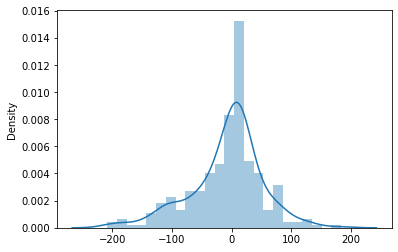

In [31]:
sns.distplot(prediction-y_test.values.reshape(-1,1))
plt.plot()

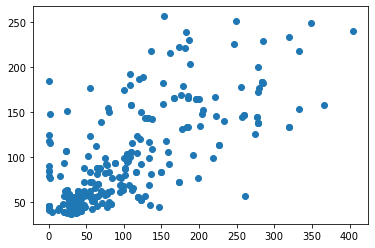

In [33]:
plt.scatter(y_test,prediction)
plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [35]:
print("MAE :{}".format(mean_absolute_error(y_test,prediction)))
print("MSE :{}".format(mean_squared_error(y_test,prediction)))

MAE :43.177371586577216
MSE :3725.8212033144955
